In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
#from matplotlib.pyplot import subplots, show
import seaborn as sns
from datetime import datetime

Web Watson Analytics IBM
https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.info()
display(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


## Brain Storming and Data Preparation

Objetivo: Predecir la cantidad total reclamada "Total Claim Amount" de un cliente según sus características sociodemográficas y del tipo de póliza, ingresos, coche, etc. 
    

### Data Cleaning and Exploratory Analysis

numCols=findNumericColumns(spotify)
f, ax=plt.subplots(math.ceil(len(numCols)/4), 4 ,figsize=(25,40))
for i,e in enumerate(numCols):
    red_outliers = dict(markerfacecolor='r', marker='o')
    ax[int(i/4)][i%4].boxplot(spotify[e],whis=0.997,flierprops=red_outliers, patch_artist=True, medianprops=dict(color='black'), boxprops=dict(facecolor='skyblue', color='black'))
    ax[int(i/4)][i%4].set_title(e)
    ax[int(i/4)][i%4].yaxis.grid(True)
    #ax[int(i/4)][i%4].set_facecolor('grey')

In [3]:
# Columns of dataset
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
# Know the unique values for each column
for item in df.columns.tolist():
    print(item, len(df[item].unique()))

Customer 9134
State 5
Customer Lifetime Value 8041
Response 2
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Income 5694
Location Code 3
Marital Status 3
Monthly Premium Auto 202
Months Since Last Claim 36
Months Since Policy Inception 100
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Total Claim Amount 5106
Vehicle Class 6
Vehicle Size 3


In [5]:
# Missing values
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


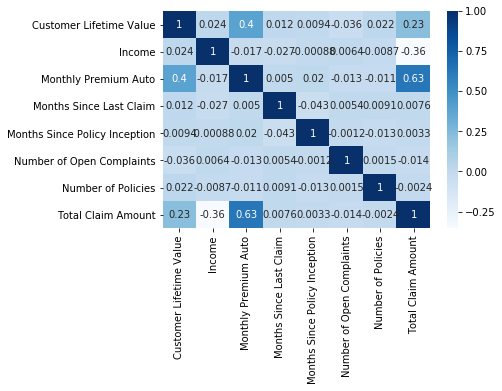

In [7]:
df.corr()
sns.heatmap(df.corr(), cmap=plt.cm.Blues,  annot=True)

### Columns - Categorical Variable

#### Effective To Date

Cambiamos Lcoation Code de tipo

In [8]:
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].head())

object
0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: Effective To Date, dtype: object


In [9]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

In [10]:
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].min())
print(df['Effective To Date'].max())
print(df['Effective To Date'].dt.year.value_counts())
print(df['Effective To Date'].dt.month.value_counts())

datetime64[ns]
2011-01-01 00:00:00
2011-02-28 00:00:00
2011    9134
Name: Effective To Date, dtype: int64
1    4898
2    4236
Name: Effective To Date, dtype: int64


#### Customers
Unique value for each customer

In [11]:
print('type', df.Customer.dtype)
print(df.Customer.head())
print(len(df.Customer.unique()))

type object
0    BU79786
1    QZ44356
2    AI49188
3    WW63253
4    HB64268
Name: Customer, dtype: object
9134


#### State
Our consumers are from 5 states in the western United States:
California    34.5%
Oregon        28.5%
Arizona       18.6%
Nevada         9.7%
Washington     8.7%


In [12]:
print('type', df.State.dtype)
print(df.State.unique())
print(len(df.State.unique()))
print((df.State.value_counts()/ sum(df.State.value_counts()))*100)
a =df.State.value_counts()

type object
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
5
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: State, dtype: float64


<BarContainer object of 5 artists>

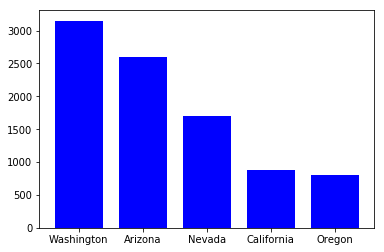

In [13]:
fig, ax = plt.subplots()    
ax.bar(df.State.unique(), df.State.value_counts(), 0.75, color="blue")

In [14]:
for i in df.columns.tolist():
    if df[i].dtype == object:
        print(i)

Customer
State
Response
Coverage
Education
EmploymentStatus
Gender
Location Code
Marital Status
Policy Type
Policy
Renew Offer Type
Sales Channel
Vehicle Class
Vehicle Size


AttributeError: 'int' object has no attribute 'bar'

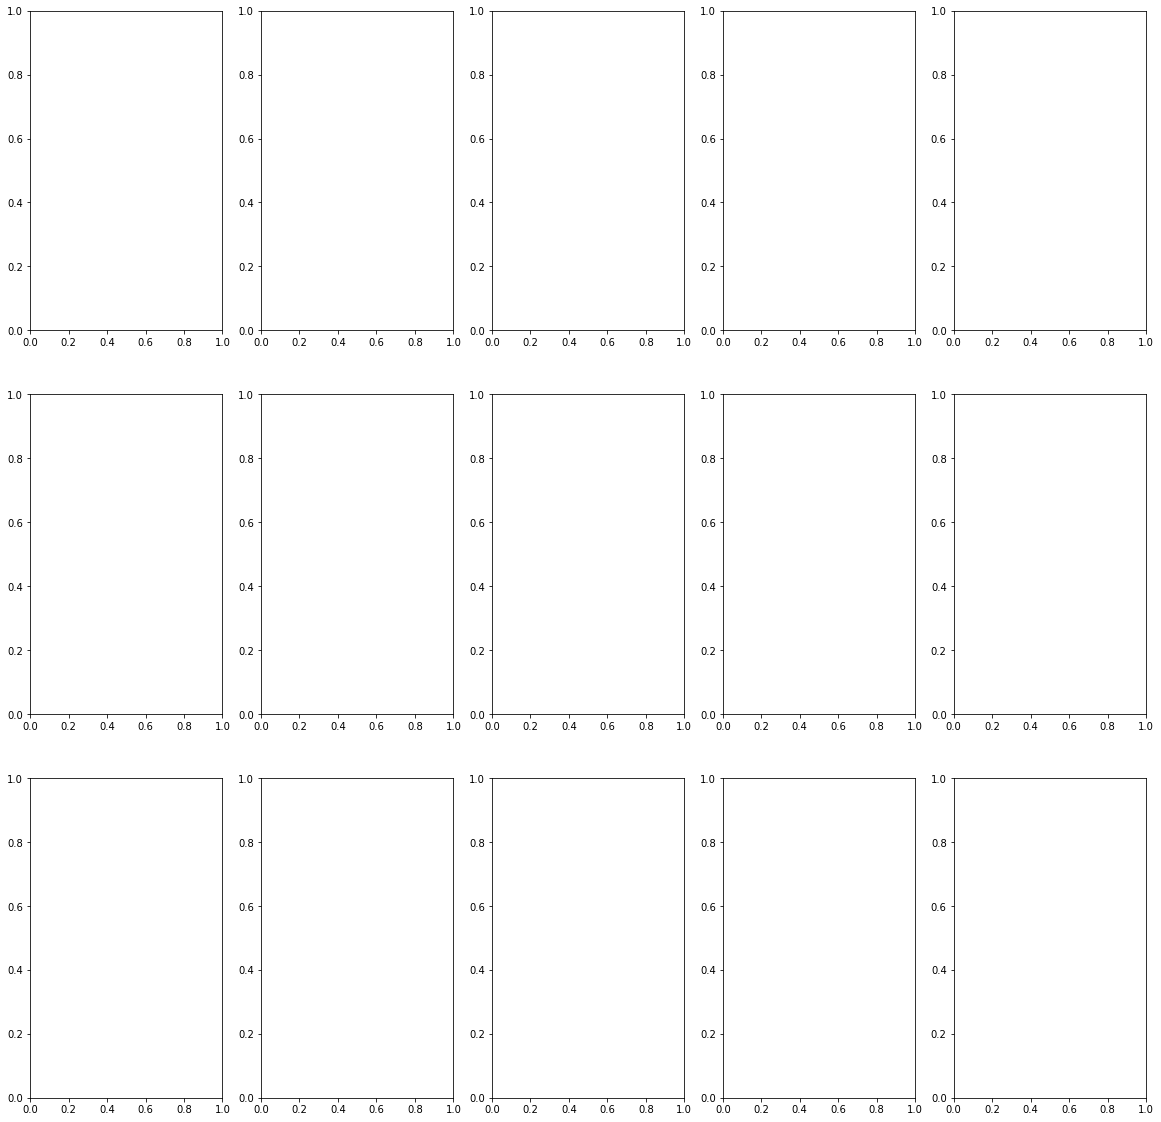

In [24]:
y = ['State','Response','Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
fig, axes = plt.subplots(3,5, figsize=(20,20))
for i, x in enumerate(y):
    i.bar(df[x].unique(), df[x].value_counts())

In [ ]:
#y = [df[x] for x in df.columns if df[x].dtype == object]
object_columns=['State','Response','Coverage']
fig,axes =plt.subplots(5,3,figsize=(10,12))
for i, x in enumerate(axes.flatten()):
    x.bar(df[i].unique(), df[i].value_counts(), 0.75, color="blue")
    x.set_xticks(df[i].unique())

In [ ]:
y = [df[x] for x in df.columns if df[x].dtype == object]
display(y)

In [ ]:
y = [df[x] for x in df.columns if df[x].dtype == object]
fig, ax = plt.subplots(1,(len(y)), figsize=(12,4))
for i, x in enumerate(y):
    ax[i].bar(df[x].unique(), df[x].value_counts(), 0.75, color="blue")

#### Response
'Response' is a categorical variable:
No     85.7%
Yes    14.3%

In [ ]:
print('type', df['Response'].dtype)
print(df['Response'].unique())
print((df.Response.value_counts()/sum(df.State.value_counts()))*100)

#### Coverage
'Coverage' is a categorical variable, with 3 categories (type of coverage): <br>
Basic       61% <br>
Extended    30% <br>
Premium      9% <br>

In [ ]:
print('type', df.Coverage.dtype)
print(df.Coverage.unique())
print(len(df.Coverage.unique()))
print((df.Coverage.value_counts()/ sum(df.Coverage.value_counts()))*100)

#### Education
'Education' is a categorical variable, with 5 categories (type of education): <br>
Bachelor                30% <br>
College                 29.3%  <br>
High School or Below    28.7% <br>
Master                   8% <br>
Doctor                   3% <br>

In [ ]:
print('type', df.Education.dtype)
print(df.Education.unique())
print(len(df.Education.unique()))
print((df.Education.value_counts()/ sum(df.Education.value_counts()))*100)

#### EmploymentStatus

In [ ]:
print('type', df.EmploymentStatus.dtype)
print(df.EmploymentStatus.unique())
print(len(df.EmploymentStatus.unique()))
print((df.EmploymentStatus.value_counts()/ sum(df.EmploymentStatus.value_counts()))*100)

#### Gender

In [ ]:
print('type', df.Gender.dtype)
print(df.Gender.unique())
print(len(df.Gender.unique()))
print((df.Gender.value_counts()/ sum(df.Gender.value_counts()))*100)

#### Location Code 

In [ ]:
print('type', df['Location Code'].dtype)
print(df['Location Code'].unique())
print(len(df['Location Code'].unique()))
print((df['Location Code'].value_counts()/ sum(df['Location Code'].value_counts()))*100)

#### Marital Status

In [ ]:
print('type', df['Marital Status'].dtype)
print(df['Marital Status'].unique())
print(len(df['Marital Status'].unique()))
print((df['Marital Status'].value_counts()/ sum(df['Marital Status'].value_counts()))*100)

#### Policy Type

In [ ]:
print('type', df['Policy Type'].dtype)
print(df['Policy Type'].unique())
print(len(df['Policy Type'].unique()))
print((df['Policy Type'].value_counts()/ sum(df['Policy Type'].value_counts()))*100)

In [ ]:
fig, ax = plt.subplots(1, (len(y))), figsize(20,5)    


for i in range(len(y)):
    ax[i].bar(df[i].unique(), df[i].value_counts(), 0.75, color="blue")



In [ ]:
Policy Type                      9134 non-null object
Policy                           9134 non-null object
Renew Offer Type                 9134 non-null object
Sales Channel                    9134 non-null object
Total Claim Amount               9134 non-null float64
Vehicle Class                    9134 non-null object
Vehicle Size                     9134 non-null object

### Columns - Numerical Variable

#### Customer Lifetime Value
The values are numerical, they present an asymmetry, as reflected in the following histogram. The maximum value is 83,325 and the minimum is 1898 with an average of 8004.

In [ ]:
print('type', df['Customer Lifetime Value'].dtype)
print(df['Customer Lifetime Value'].head())
print('max', df['Customer Lifetime Value'].max())
print('min', df['Customer Lifetime Value'].min())
print('mean', df['Customer Lifetime Value'].mean())

In [ ]:
sns.distplot(df['Customer Lifetime Value'], bins=30, norm_hist= True, kde= True, kde_kws={"color": "Red", "lw": 1, "label": "KDE"}, label='Customer Lifetime Value distribution', vertical=False)



#### Income

In [ ]:
print('type', df.Income.dtype)
print(df.Income.head())
print('max', df.Income.max())
print('min', df.Income.min())
print('mean', df.Income.mean())

In [ ]:
sns.distplot(df['Income'], bins=15, norm_hist= True, kde= True, kde_kws={"color": "Red", "lw": 1, "label": "KDE"}, label='Customer Lifetime Value distribution', vertical=False)





#### Monthly Premium Auto

In [ ]:
print('type', df['Monthly Premium Auto'].dtype)
print(df['Monthly Premium Auto'].head())
print('max', df['Monthly Premium Auto'].max())
print('min', df['Monthly Premium Auto'].min())
print('mean', df['Monthly Premium Auto'].mean())

In [ ]:
sns.distplot(df['Monthly Premium Auto'], bins=15, norm_hist= True, kde= True, kde_kws={"color": "Red", "lw": 1, "label": "KDE"}, label='Customer Lifetime Value distribution', vertical=False)


In [ ]:
Months Since Last Claim         
Months Since Policy Inception    
Number of Open Complaints        
Number of Policies               
Policy Type                     
Policy                           
Renew Offer Type                 
Sales Channel                   
Total Claim Amount               
Vehicle Class                    
Vehicle Size                     

In [ ]:
Months Since Last Claim         
